In [74]:
import updated_model
import numpy as np
from tqdm import tqdm

In [8]:
ACCURACY = updated_model.ACCURACY

In [9]:
OUTCOME_MAP = updated_model.OUTCOME_MAP



In [4]:
updated_model.get_neighbours(20)

{'target': 20, 'lower': 5, 'upper': 1, 'constant': 1}

In [112]:
def sim_strat(score,throw,strategies,accuracy):
    count = 0
    ongoing_flag = True
    while ongoing_flag:
        if throw == 3:
            throw = 0
            count += 1
        strategy = strategies[throw][score]
        targets = updated_model.get_neighbours(strategy[1])
        outcomes = updated_model.OUTCOME_MAP[strategy[0]]
        probs = [accuracy[outcome[0]] for outcome in outcomes]
        outcome = outcomes[np.random.choice(range(len(outcomes)),p=probs)]
        
        throw += 1

        
        payoff = outcome[1] * targets[outcome[2]]
        if score - payoff == 0 and outcome[1] == 2:
            ongoing_flag = False
            break
        
        if score == 50 and outcome == 50:
            ongoing_flag = False
            break

        elif ongoing_flag and score - payoff <= 1:
            count += 1
        else:
            score = int(score - payoff)
    return count
        
        

In [113]:
def sim_expectations(score,throw,strategies,accuracy,num_sims):
    sims = [sim_strat(score,throw,strategies,accuracy) for x in range(num_sims)]
    return sum(sims)/num_sims



In [120]:
max_val = 60
optimal_strategies, optimal_strategy_values = updated_model.gen_optimal_strategies(updated_model.ACCURACY,max_val)



  0%|          | 0/58 [00:00<?, ?it/s]

100%|██████████| 58/58 [00:00<00:00, 815.51it/s]

In [122]:
baseline_strategies, baseline_strategy_values = updated_model.gen_baseline_strategies(updated_model.ACCURACY,180)



  0%|          | 0/178 [00:00<?, ?it/s]

100%|██████████| 178/178 [00:00<00:00, 12518.42it/s]

In [123]:
score = 30
throw = 0
strategies = optimal_strategies
accuracy = updated_model.ACCURACY
sim_strat(score,throw,strategies,accuracy)
sim_expectations(score,throw,strategies,accuracy,1000)


0.38

In [129]:
def sim_all_strategies(max_score,strategies,accuracy,num_sims):

    sim_strategy_values = np.empty((3,max_score))
    for score in range(2,max_score):
        for throw in range(3):
            sim_strategy_values[throw][score] = sim_expectations(score,throw,optimal_strategies,ACCURACY,num_sims)
    return sim_strategy_values

sim_strategies = sim_all_strategies(30,optimal_strategies,ACCURACY,2000)

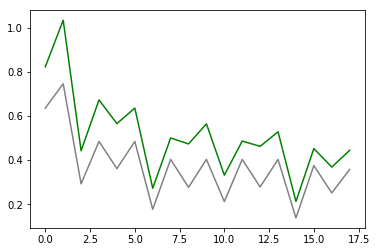

In [130]:
import matplotlib.pyplot as plt
plt.plot(sim_strategies[0][2:20],'green')
plt.plot(optimal_strategy_values[0][2:20],'grey')
plt.show()

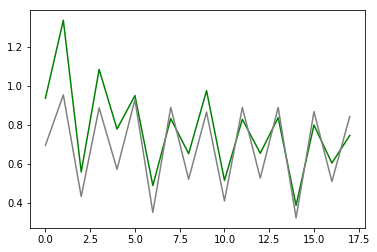

In [131]:
plt.plot(sim_strategies[1][2:20],'green')
plt.plot(optimal_strategy_values[1][2:20],'grey')
plt.show()

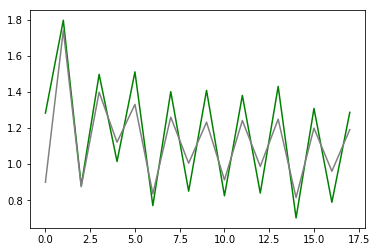

In [132]:
plt.plot(sim_strategies[2][2:20],'green')
plt.plot(optimal_strategy_values[2][2:20],'grey')
plt.show()

In [111]:
sim_strategies[0][2]
optimal_strategy_values[0][2]

0.635911529904463